In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from supplyseer.experimental.exotic_supplychain.geopolitical import *

In [3]:
risk_module = create_current_conflict_scenario()

Added event: Ukraine-Russia Conflict in Ukraine with risk level critical
Added event: Taiwan Strait Tensions in Taiwan with risk level high
Added event: Red Sea Shipping Crisis in Red Sea with risk level severe


In [4]:
# Test commodity risk analysis
semiconductor_risk = risk_module.analyze_commodity_risk("semiconductors")
print(f"Semiconductor Risk Level: {semiconductor_risk.risk_level}")
print(f"Affected by conflicts: {semiconductor_risk.affected_by_conflicts}")
print(f"Alternative sources: {semiconductor_risk.alternative_sources}")

# Generate impact report
impact_report = risk_module.generate_conflict_impact_report()
for report in impact_report:
    print(f"\nConflict: {report.conflict_name}")
    print(f"Severity: {report.severity}")
    print(f"Lead Time Impact: {report.lead_time_impact}")
    print(f"Cost Impact: {report.cost_impact}")

Semiconductor Risk Level: RiskLevel.HIGH
Affected by conflicts: [{'conflict': 'Taiwan Strait Tensions', 'severity': <RiskLevel.HIGH: 'high'>, 'affected_regions': ['Taiwan', 'South China Sea'], 'sanctions': []}]
Alternative sources: []

Conflict: Ukraine-Russia Conflict
Severity: critical
Lead Time Impact: 500.0%
Cost Impact: 650.0%

Conflict: Taiwan Strait Tensions
Severity: high
Lead Time Impact: 95.0%
Cost Impact: 110.0%

Conflict: Red Sea Shipping Crisis
Severity: severe
Lead Time Impact: 300.0%
Cost Impact: 400.0%


In [5]:
datetime(2024, 2, 1)

datetime.datetime(2024, 2, 1, 0, 0)

In [6]:
risk_module.calculate_route_risk(
    origin="Shanghai",
    destination="Rotterdam",
    route_waypoints=[
        "Singapore",
        "Suez Canal",
        "Mediterranean"
    ],
    date=datetime(2024, 2, 1)
)

RouteRiskAssessment(risk_score=1.0, delay_factor=1.0, cost_factor=1.0, impacted_segments=[], risk_level=<RiskLevel.LOW: 'low'>)

In [11]:
risk_module.suggest_alternative_routes(
    origin="Shanghai",
    destination="Rotterdam",
    date=datetime(2024, 2, 1)
)

[]

In [7]:
from supplyseer.experimental.exotic_supplychain.gdeltmonitor import *

In [18]:
gdelt_monitor = SupplyChainGDELTMonitor()

In [19]:
import asyncio

risks =  gdelt_monitor.monitor_region_risks("Taiwan", timespan="7d")
type(risks)

coroutine

In [8]:
# This is the preferred way in Jupyter notebooks
async def get_risks():
    async with SupplyChainGDELTMonitor() as gdelt_monitor:
        risks = await gdelt_monitor.monitor_region_risks("sweden", timespan="7d")
        return risks

# Then run it with await
risks = await get_risks()
pd.json_normalize(risks)

,supply_disruption,geopolitical,infrastructure,trade_restrictions,natural_disasters
0,"[{'title': 'Two police shootings in 17 , 000 o...","[{'title': 'Fethullah Gülen , Turkish spiritua...",[],[],[]


In [39]:
output = pd.json_normalize(risks, record_path="geopolitical")

In [10]:
output

,title,url,source_country,tone,date,themes
0,"Two police shootings in 17 , 000 operations : ...",https://www.thetimes.com/uk/crime/article/two-...,,0.0,20241027T014500Z,[]
1,Two Shunned Cargo Ships Find Resolution to D...,https://www.maritime-executive.com/article/two...,United States,0.0,20241025T210000Z,[]
2,"Iran News in Brief – October 25 , 2024",https://www.ncr-iran.org/en/news/iran-news-in-...,Iran,0.0,20241025T090000Z,[]
3,EV fires are worse but far less frequent than ...,https://www.stcatharinesstandard.ca/news/ontar...,Canada,0.0,20241025T003000Z,[]
4,25 of the Most Essential Movies About Witches,https://www.mentalfloss.com/essential-movies-a...,United States,0.0,20241024T233000Z,[]
...,...,...,...,...,...,...
104,Self - exiled Turkish spiritual leader Fethull...,https://gazette.com/ap/national/self-exiled-tu...,United States,0.0,20241021T094500Z,[]
105,Self - exiled Turkish spiritual leader Fethull...,https://www.clickorlando.com/news/world/2024/1...,United States,0.0,20241021T094500Z,[]
106,Self - exiled Turkish spiritual leader Fethull...,https://ktar.com/story/5617261/self-exiled-tur...,United States,0.0,20241021T094500Z,[]
107,Self - exiled Turkish spiritual leader Fethull...,https://www.durangoherald.com/articles/self-ex...,United States,0.0,20241021T094500Z,[]


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", device="cuda")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [42]:
import transformers
transformers.__version__

'4.46.0'

In [40]:
titles = output.title.to_list()
origins = output["source_country"].to_list()



In [41]:
for title, origin in zip(titles, origins):
    sentiment = sentiment_pipeline(title)[0]["label"].lower()
    score = sentiment_pipeline(title)[0]["score"]*100
    score = round(score, 2)

    print(f"Origin country: {origin}")
    print(f"Title: '{title}' is \n{score}% {sentiment}")
    print("---"*10)

Origin country: United States
Title: 'Fethullah Gülen , Turkish spiritual leader who fled into exile and became an enemy of Erdoğan' is 
54.37% positive
------------------------------
Origin country: United Kingdom
Title: 'Fethullah Gülen , Turkish spiritual leader who fled into exile and became an enemy of Erdoğan' is 
54.37% positive
------------------------------
Origin country: 
Title: 'Two police shootings in 17 , 000 operations : the united kingdom record in charts' is 
80.54% positive
------------------------------
Origin country: Canada
Title: 'Canada was ranked one of the safest countries to travel to in 2025 but it no longer # 1' is 
97.12% negative
------------------------------
Origin country: 
Title: 'No , WWIII is not inevitable – Deseret News' is 
98.82% positive
------------------------------
Origin country: United States
Title: 'Time To Stop Ignoring The Türkiye Threat' is 
83.59% negative
------------------------------
Origin country: Iran
Title: 'Iran News in Brief –

In [75]:
model_dir = "D:/my_py_packages/supplyseer/src/supplyseer/experimental/computer-vision"

In [105]:
from transformers import ViTImageProcessor, ViTModel
from PIL import Image
import requests

url = 'https://cloudfront-us-east-1.images.arcpublishing.com/archetype/U3AIG3FYQBFNPMH2FBNCJRZ7RU.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

In [108]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a picture of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


: 

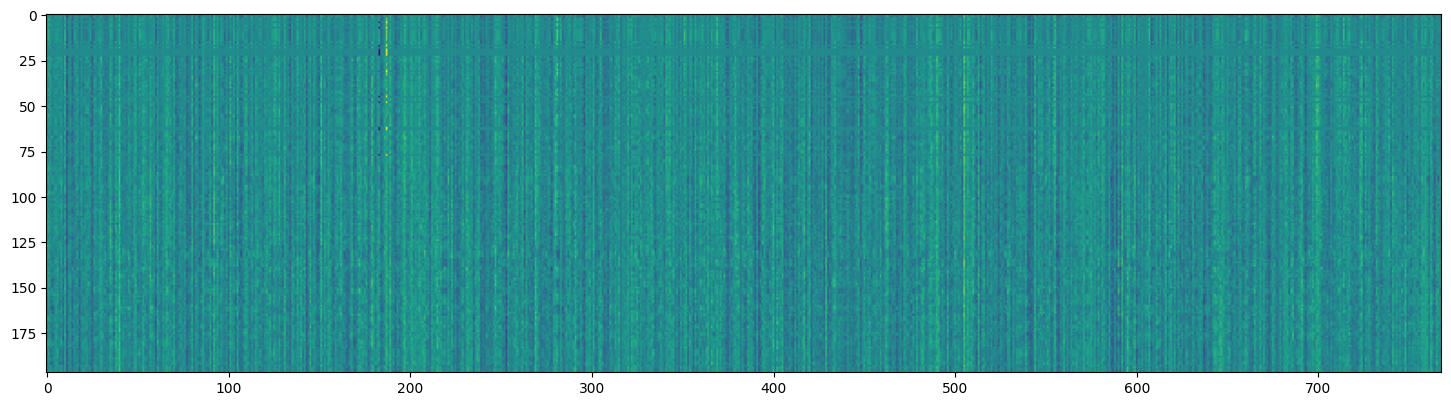

In [106]:
plt.figure(figsize=(18, 10))
plt.imshow(last_hidden_states.detach().cpu().numpy().squeeze(0))

In [69]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import random

class SimpleRoutingEnv(gym.Env):
    """
    A simple grid environment for supply delivery routing.
    The agent must navigate from the start to the goal while avoiding obstacles.
    """
    metadata = {'render_modes': ['human']}

    def __init__(self, grid_size=5):
        super(SimpleRoutingEnv, self).__init__()
        
        self.grid_size = grid_size
        # Define action and observation space
        # Actions: 0=Up, 1=Down, 2=Left, 3=Right
        self.action_space = spaces.Discrete(4)
        
        # Observation: agent's current position (x, y)
        self.observation_space = spaces.Box(low=0, high=grid_size-1, 
                                            shape=(2,), dtype=np.int32)
        
        # Define start and goal positions
        self.start_pos = np.array([0, 0])
        self.goal_pos = np.array([grid_size-1, grid_size-1])
        
        # Define obstacles
        self.obstacles = [np.array([1, 2]), np.array([2, 2]), np.array([3, 1])]
        
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.agent_pos = self.start_pos.copy()
        self.steps = 0
        return self.agent_pos, {}

    def step(self, action):
        self.steps += 1
        previous_distance = np.linalg.norm(self.agent_pos - self.goal_pos)
        # Define movement
        if action == 0:  # Up
            self.agent_pos[1] = max(self.agent_pos[1] - 1, 0)
        elif action == 1:  # Down
            self.agent_pos[1] = min(self.agent_pos[1] + 1, self.grid_size - 1)
        elif action == 2:  # Left
            self.agent_pos[0] = max(self.agent_pos[0] - 1, 0)
        elif action == 3:  # Right
            self.agent_pos[0] = min(self.agent_pos[0] + 1, self.grid_size - 1)
        
        done = False
        reward = -1  # Default reward for each step to encourage faster solutions
        
        # Check for collision with obstacles
        if any(np.array_equal(self.agent_pos, obs) for obs in self.obstacles):
            reward -= 10
            done = True

        current_distance = np.linalg.norm(self.agent_pos - self.goal_pos)

        if current_distance < previous_distance:
            reward += 1
        elif current_distance > previous_distance:
            reward -= 1
        
        # Check if goal is reached
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward += 20
            done = True
        
        # Optional: Limit the number of steps
        if self.steps >= 100:
            done = True
        
        return self.agent_pos, reward, done, False, {}

    def render(self, mode='human'):
        grid = np.full((self.grid_size, self.grid_size), ' - ')
        for obs in self.obstacles:
            grid[obs[1], obs[0]] = ' X '
        grid[self.goal_pos[1], self.goal_pos[0]] = ' G '
        grid[self.agent_pos[1], self.agent_pos[0]] = ' A '
        print("\n".join([''.join(row) for row in grid]))
        print()


In [70]:
env = SimpleRoutingEnv()

In [71]:
env.render()

 A  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 -  -  -  -  - 
 -  -  -  -  G 



In [40]:
np.full((5,5), ' - ')

array([[' - ', ' - ', ' - ', ' - ', ' - '],
       [' - ', ' - ', ' - ', ' - ', ' - '],
       [' - ', ' - ', ' - ', ' - ', ' - '],
       [' - ', ' - ', ' - ', ' - ', ' - '],
       [' - ', ' - ', ' - ', ' - ', ' - ']], dtype='<U3')

In [41]:
env.step(3)
env.render()
env.reset()

 -  A  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 -  -  -  -  - 
 -  -  -  -  G 



(array([0, 0]), {})

In [42]:
env.render()

 A  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 -  -  -  -  - 
 -  -  -  -  G 



In [58]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env
import gymnasium as gym


In [72]:
check_env(env)

In [73]:
model = PPO("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [75]:
env = make_vec_env(lambda: SimpleRoutingEnv(), n_envs=4)

In [80]:
model.learn(total_timesteps=10000, progress_bar=True)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11       |
|    ep_rew_mean     | -14.1    |
| time/              |          |
|    fps             | 384      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 8.11      |
|    ep_rew_mean          | -9.43     |
| time/                   |           |
|    fps                  | 316       |
|    iterations           | 2         |
|    time_elapsed         | 12        |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0246608 |
|    clip_fraction        | 0.36      |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.31     |
|    explained_variance   | -0.178    |
|    learning_rate        | 0.0003    |
|    loss           

In [79]:
2e5

200000.0

In [81]:
# Initialize the environment
env = SimpleRoutingEnv()
obs, info = env.reset()

env.render()

done = False
total_reward = 0

while not done:
    action, _states = model.predict(obs, deterministic=False)
    obs, reward, done, truncated, info = env.step(action)
    total_reward += reward
    env.render()

print(f"Total Reward: {total_reward}")


 A  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 -  -  -  -  - 
 -  -  -  -  G 

 -  -  -  -  - 
 A  -  -  X  - 
 -  X  X  -  - 
 -  -  -  -  - 
 -  -  -  -  G 

 -  -  -  -  - 
 -  -  -  X  - 
 A  X  X  -  - 
 -  -  -  -  - 
 -  -  -  -  G 

 -  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 A  -  -  -  - 
 -  -  -  -  G 

 -  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 -  -  -  -  - 
 A  -  -  -  G 

 -  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 A  -  -  -  - 
 -  -  -  -  G 

 -  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 -  A  -  -  - 
 -  -  -  -  G 

 -  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 -  -  A  -  - 
 -  -  -  -  G 

 -  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 -  -  -  A  - 
 -  -  -  -  G 

 -  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 -  -  -  -  - 
 -  -  -  A  G 

 -  -  -  -  - 
 -  -  -  X  - 
 -  X  X  -  - 
 -  -  -  -  - 
 -  -  -  -  A 

Total Reward: 18


In [83]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import random
import heapq

def is_path_available(start, goal, obstacles, grid_size):
    """
    Uses A* algorithm to check if a path exists from start to goal avoiding obstacles.
    """
    open_set = []
    heapq.heappush(open_set, (0, tuple(start)))
    came_from = {}
    g_score = {tuple(start): 0}
    
    while open_set:
        current = heapq.heappop(open_set)[1]
        if np.array_equal(np.array(current), goal):
            return True
        for action in range(4):
            neighbor = np.array(current)
            if action == 0:  # Up
                neighbor[1] = max(neighbor[1] - 1, 0)
            elif action == 1:  # Down
                neighbor[1] = min(neighbor[1] + 1, grid_size - 1)
            elif action == 2:  # Left
                neighbor[0] = max(neighbor[0] - 1, 0)
            elif action == 3:  # Right
                neighbor[0] = min(neighbor[0] + 1, grid_size - 1)
            neighbor_tuple = tuple(neighbor)
            if neighbor_tuple in [tuple(obs) for obs in obstacles]:
                continue
            tentative_g_score = g_score[current] + 1
            if neighbor_tuple not in g_score or tentative_g_score < g_score[neighbor_tuple]:
                came_from[neighbor_tuple] = current
                g_score[neighbor_tuple] = tentative_g_score
                f_score = tentative_g_score + np.linalg.norm(neighbor - goal)
                heapq.heappush(open_set, (f_score, neighbor_tuple))
    return False

class SimpleRoutingEnv(gym.Env):
    """
    A grid environment for supply delivery routing with enhanced observations and reward structure.
    """
    metadata = {'render_modes': ['human']}

    def __init__(self, grid_size=10, num_obstacles=15, observation_radius=2):
        super(SimpleRoutingEnv, self).__init__()
        
        self.grid_size = grid_size
        self.num_obstacles = num_obstacles
        self.observation_radius = observation_radius
        
        # Define action and observation space
        # Actions: 0=Up, 1=Down, 2=Left, 3=Right
        self.action_space = spaces.Discrete(4)
        
        # Observation: local grid around the agent
        self.local_grid_size = 2 * self.observation_radius + 1
        # 0: empty, 1: obstacle, 2: goal
        self.observation_space = spaces.Box(low=0, high=2, 
                                            shape=(self.local_grid_size, self.local_grid_size), 
                                            dtype=np.int8)
        
        # Define start and goal positions
        self.start_pos = np.array([0, 0])
        self.goal_pos = np.array([self.grid_size-1, self.grid_size-1])
        
        self.obstacles = []
        self.agent_pos = self.start_pos.copy()
        self.steps = 0

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.agent_pos = self.start_pos.copy()
        self.steps = 0
        
        # Randomize obstacle positions ensuring path availability
        while True:
            self.obstacles = []
            while len(self.obstacles) < self.num_obstacles:
                pos = np.array([random.randint(0, self.grid_size-1),
                               random.randint(0, self.grid_size-1)])
                if not np.array_equal(pos, self.start_pos) and not np.array_equal(pos, self.goal_pos) and not any(np.array_equal(pos, obs) for obs in self.obstacles):
                    self.obstacles.append(pos)
            if is_path_available(self.start_pos, self.goal_pos, self.obstacles, self.grid_size):
                break
        
        self.visited = set()
        self.visited.add(tuple(self.agent_pos))
        
        return self.get_local_observation(), {}

    def get_local_observation(self):
        """
        Returns a local grid around the agent indicating obstacles and the goal.
        """
        local_obs = np.zeros((self.local_grid_size, self.local_grid_size), dtype=np.int8)
        for obs in self.obstacles:
            rel_pos = obs - self.agent_pos
            if (abs(rel_pos[0]) <= self.observation_radius) and (abs(rel_pos[1]) <= self.observation_radius):
                local_x = rel_pos[0] + self.observation_radius
                local_y = rel_pos[1] + self.observation_radius
                if 0 <= local_x < self.local_grid_size and 0 <= local_y < self.local_grid_size:
                    local_obs[local_y, local_x] = 1  # Obstacle
        # Mark the goal position relative to the agent
        rel_goal = self.goal_pos - self.agent_pos
        if (abs(rel_goal[0]) <= self.observation_radius) and (abs(rel_goal[1]) <= self.observation_radius):
            local_x = rel_goal[0] + self.observation_radius
            local_y = rel_goal[1] + self.observation_radius
            if 0 <= local_x < self.local_grid_size and 0 <= local_y < self.local_grid_size:
                local_obs[local_y, local_x] = 2  # Goal
        return local_obs

    def step(self, action):
        self.steps += 1
        previous_distance = np.linalg.norm(self.agent_pos - self.goal_pos)
        
        # Define movement
        if action == 0:  # Up
            self.agent_pos[1] = max(self.agent_pos[1] - 1, 0)
        elif action == 1:  # Down
            self.agent_pos[1] = min(self.agent_pos[1] + 1, self.grid_size - 1)
        elif action == 2:  # Left
            self.agent_pos[0] = max(self.agent_pos[0] - 1, 0)
        elif action == 3:  # Right
            self.agent_pos[0] = min(self.agent_pos[0] + 1, self.grid_size - 1)
        
        done = False
        reward = -0.1  # Small step penalty to encourage efficiency
        
        # Check for collision with obstacles
        if any(np.array_equal(self.agent_pos, obs) for obs in self.obstacles):
            reward -= 10  # Increased penalty
            done = True
        
        # Calculate new distance to goal
        current_distance = np.linalg.norm(self.agent_pos - self.goal_pos)
        
        # Reward for moving closer to the goal
        if current_distance < previous_distance:
            reward += 1  # Reward for progress
        elif current_distance > previous_distance:
            reward -= 1  # Penalty for moving away
        
        # Check if goal is reached
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward += 20  # Increased reward for reaching the goal
            done = True
        
        # Optional: Limit the number of steps
        if self.steps >= 50:
            done = True
        
        return self.get_local_observation(), reward, done, False, {}

    def render(self, mode='human'):
        grid = np.full((self.grid_size, self.grid_size), ' - ', dtype=object)
        for obs in self.obstacles:
            grid[obs[1], obs[0]] = ' X '
        grid[self.goal_pos[1], self.goal_pos[0]] = ' G '
        grid[self.agent_pos[1], self.agent_pos[0]] = ' A '
        print("\n".join([''.join(row) for row in grid]))
        print()


In [84]:
import torch as th
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from torch import nn

class CustomCNN(BaseFeaturesExtractor):
    """
    Custom CNN to extract features from local grid observations.
    """
    def __init__(self, observation_space: spaces.Box, features_dim: int = 128):
        super(CustomCNN, self).__init__(observation_space, features_dim)
        # Assuming observation is a 2D grid (local_grid_size x local_grid_size)
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # Output: 32 x grid x grid
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # Output: 64 x grid x grid
            nn.ReLU(),
            nn.Flatten()
        )
        
        # Compute the shape by doing one forward pass
        with th.no_grad():
            sample_input = th.as_tensor(observation_space.sample()[None, None, ...], dtype=th.float32)
            n_flatten = self.conv(sample_input).shape[1]
        
        self.linear = nn.Sequential(
            nn.Linear(n_flatten, features_dim),
            nn.ReLU()
        )
    
    def forward(self, observations: th.Tensor) -> th.Tensor:
        # Add channel dimension
        observations = observations.unsqueeze(1).float()
        return self.linear(self.conv(observations))


In [85]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env

# Initialize a single environment for checking
env = SimpleRoutingEnv(grid_size=10, num_obstacles=15, observation_radius=2)

# Check environment compliance
check_env(env, warn=True)

# Create a vectorized environment with 4 parallel environments
vec_env = make_vec_env(lambda: SimpleRoutingEnv(grid_size=10, num_obstacles=15, observation_radius=2), n_envs=4)

# Define policy keyword arguments to include the custom CNN
policy_kwargs = dict(
    features_extractor_class=CustomCNN,
    features_extractor_kwargs=dict(),
)

# Initialize the PPO model with the custom CNN policy
model = PPO(
    "CnnPolicy", 
    vec_env, 
    verbose=1, 
    policy_kwargs=policy_kwargs,
    learning_rate=3e-4,
    gamma=0.99,
    ent_coef=0.01,
    n_steps=2048,
    batch_size=64,
    gae_lambda=0.95,
    clip_range=0.2,
    vf_coef=0.5,
    max_grad_norm=0.5
)


Using cuda device


c:\Users\jako\anaconda3\envs\playground\Lib\site-packages\stable_baselines3\common\env_checker.py:263: UserWarning: Your observation  has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


In [86]:
# Train the PPO agent
model.learn(total_timesteps=50000)

# Save the trained model
model.save("ppo_simple_routing_cnn")


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.7     |
|    ep_rew_mean     | -7.61    |
| time/              |          |
|    fps             | 743      |
|    iterations      | 1        |
|    time_elapsed    | 11       |
|    total_timesteps | 8192     |
---------------------------------


c:\Users\jako\anaconda3\envs\playground\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19.3         |
|    ep_rew_mean          | -6.5         |
| time/                   |              |
|    fps                  | 548          |
|    iterations           | 2            |
|    time_elapsed         | 29           |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0123272715 |
|    clip_fraction        | 0.166        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | -0.0288      |
|    learning_rate        | 0.0003       |
|    loss                 | 3.75         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.025       |
|    value_loss           | 7.58         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

In [ ]:
from stable_baselines3.common.logger import configure

# Set up TensorBoard logging
new_logger = configure("logs/", ["stdout", "tensorboard"])
model.set_logger(new_logger)

# Continue training with TensorBoard logging
model.learn(total_timesteps=50000)
